In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
resp = requests.get("https://www.mohfw.gov.in/")

In [7]:
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content, 'html.parser')
    
### Getting Active Cases ###
    active_cases = soup.find_all('li', class_='bg-blue')[0]
    active_cases = active_cases.get_text().split("\n")

### Getting Total Recovered ###
    tot_recovered = soup.find_all('li', class_='bg-green')[0]
    tot_recovered = tot_recovered.get_text().split("\n")
    print(tot_recovered)

### Getting Total Deaths ###
    tot_death = soup.find_all('li', class_='bg-red')[0]
    tot_death = tot_death.get_text().split("\n")
    print(tot_death)

### Getting Table details ###
    table = soup.find_all('table')[0]
    status = soup.find_all('div', class_='status-update')[0]
    Title = str(status.get_text()).split('\n')
    Head = Title[1].split('as')
#------------------------------------------------------------------------------------------------------#
### Getting Table details ###
    columns = []
    for head in table.find_all('th'):
        columns.append(head.get_text())

    rows = 0
    colm = []
    for row in table.find_all('tr'):
        cols = 0
        for col in row.find_all('td'):
            colm.append(col.get_text())
            cols += 1
            
    final = []
    for i in range(0,len(colm)):
        new_colm = []
        for j in range(i,len(colm), 5):
            new_colm.append(colm[j])
        final.append(new_colm)
        
    fin_dict = {}  
    for cnt in range(0,len(columns)):
        fin_dict[columns[cnt]] = final[cnt]
    
    table = pd.DataFrame(data=fin_dict)
    #table.to_excel(r''+Head[0]+".xlsx",index = False)

    new_table = table[:-1] # Eliminating last row
    
    States = new_table[columns[1]]
    Confirmed = new_table[columns[2]].map(int)
    recovered = new_table[columns[3]].map(int)
    death = new_table[columns[4]].map(int)
#-------------------------------------------------------------------------------------------------------#
### Visualization - Bar Plot ###
    X = np.arange(len(final[1])-1)
    fig = plt.figure(figsize = (20,10))

    plt.bar(X, Confirmed, 0.25, color='g')
    plt.bar(X+0.25, recovered, 0.25, color='b')
    plt.bar(X+0.50, death, 0.25, color='r')

    plt.xticks(X, States, rotation=90)
    plt.yticks(np.arange(0,2001,50))
   
    plt.xlabel('States/UT',fontsize = 15)
    plt.ylabel('Count',fontsize = 15)
    plt.title(Title[1],fontsize = 15)

    plt.legend(labels=['Active Cases - '+active_cases[2],'Recovered - '+tot_recovered[2], 'Deaths - '+tot_death[2]],loc ='upper right', fontsize = 15)
    for index, value in enumerate(Confirmed):
        plt.text(index, value, str(value), fontsize = 20, color='r',horizontalalignment = 'center',verticalalignment = 'bottom')

    plt.savefig('Case-Study-1.png')

['', '', '652', 'Cured / Discharged ', 'Cured/ ', 'Discharged ', '']
['', '', '242', 'Deaths', '']


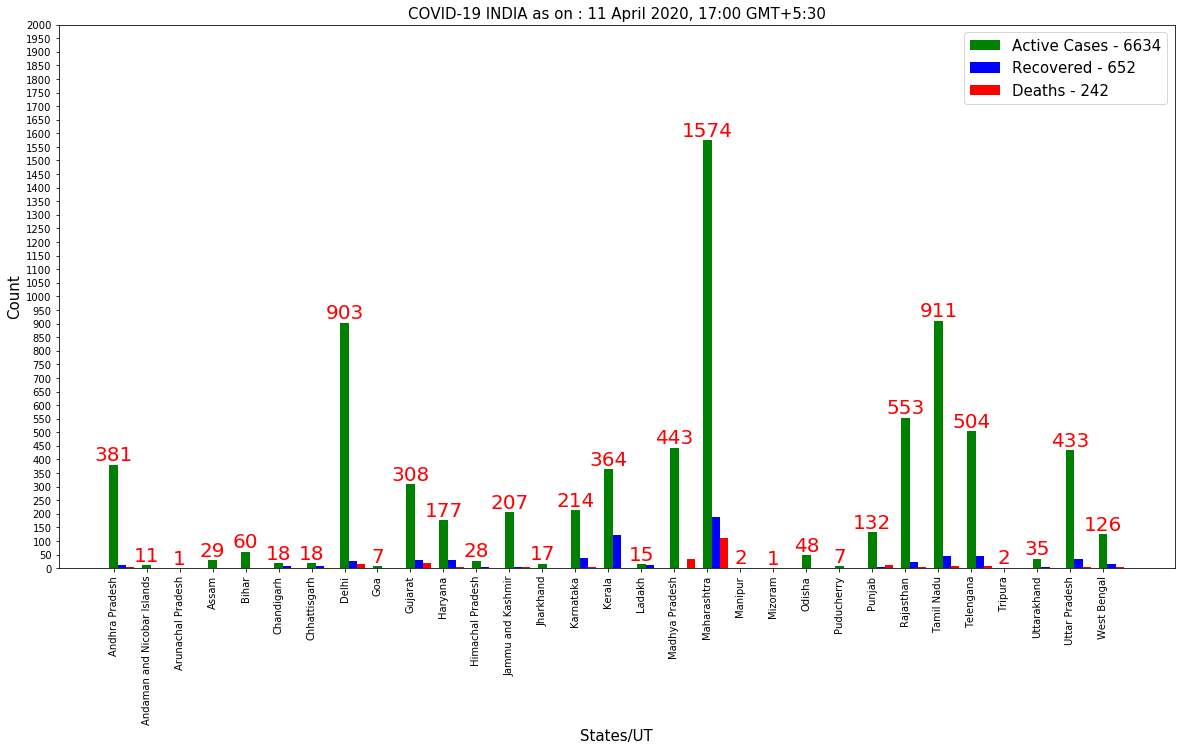

In [8]:
fig